<font color='darkgreen' size='5' face='verdana'>**Case Study Analysis: "Prediction and Probabilistic Analysis of Flood Occurrence in Kerala"**</font>



<font color='BLUE' size='5'><b>PROBLEM STATEMENT:</b></font>

<font color='navy'>The challenge of predicting floods using historical rainfall data.</font>

<font color='navy'>The importance of this task for disaster management and mitigation.</font>


Flooding is a natural disaster that poses significant challenges to communities and regions worldwide. The ability to predict and anticipate floods is crucial for effective disaster management and mitigation efforts.Historical rainfall data serves as a valuable resource for developing predictive models that can help identify areas at risk of flooding. 

<font color='blue' size='5'><b>TASK:</b></font>
- Goal: Predict whether a flood will occur based on rainfall data.
- Keeping different conditions in rainfall scenarios (conditional probability) understand the rate of flooding.
- Objective: Develop a predictive model using machine learning techniques.
- Evaluation Metric: Specify the evaluation metric (e.g., accuracy, precision, recall, F1-score) for assessing model performance.

<font color='green' size='5' face='verdana'>**IMPORTING REQUIRED LIBRARIES**</font>

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

In [ ]:
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization

In [ ]:
import warnings
warnings.filterwarnings("ignore") # Ignore warnings 

###### from scikit-learn 

In [ ]:
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables

In [ ]:
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

In [ ]:
from sklearn.preprocessing import StandardScaler  # For standardizing features

In [ ]:
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning using grid search

In [ ]:
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier

In [ ]:
from sklearn.svm import SVC  # Support Vector Machine classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# For evaluating 

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier

<font color='green' size='5' face='verdana'>**LOAD THE DATASET**</font>

In [ ]:
flood = pd.read_csv("kerala.csv.xls")

In [ ]:
flood

<font color='green' size='5' face='verdana'>**MAKING A COPY OF THE DATASET**</font>

In [ ]:
flood_copy = flood.copy()
flood_copy

In [ ]:
# save data frame to new df for dashboard creating
flood.to_csv('KERALA_FLOOD.csv', index=False)

<font color='green' size='5' face='verdana'>**ABOUT THE DATASET**</font>

<font color='navy' size='3'>**The dataset contains the monthly rainfall data from years 1901 to 2018 for the Indian state of Kerala. Kerala is one of the few states which are usually badly hit by monsoons every year.**</font>

In [ ]:
print("THE NUMBER OF ROWS AND COLUMNS: ",flood.shape)
print("THE TOTAL NUMBER OF ELEMENTS IN THE DATASET: ",flood.size)

    Takeaway:
       - there is 1888 elements in the dataset with 118 rows and 16 columns

<font color='green' size='5' face='verdana'>**UNDERSTANDING THE FEATURES**</font>

In [ ]:
print("COLUMN NAMES : \n ",flood.columns)

**The data contains 32561 instances with the following attributes:**
- 'SUBDIVISION' : Represents the geographical subdivision associated with the data.
- 'YEAR' : Represents the calendar year for which the data is recorded.
- 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC' : Monthly rainfall data for each respective month.
- ' ANNUAL RAINFALL' : Represents the total annual rainfall for the given year.
- 'FLOODS' : Binary variable indicating the occurrence of floods.

                        "YES" indicates that floods occurred.
                        "NO" indicates the absence of floods.                             

<font color='green' size='5' face='verdana'>**RENAMING THE COLUMN**</font>

In [ ]:
flood.rename(columns={" ANNUAL RAINFALL":"ANNUAL RAINFALL"},inplace=True)

In [ ]:
flood.sample(3)

<font color='green' size='5' face='verdana'>**HAVE A LOOK AT THE DATASET**</font>

In [ ]:
flood.head()

In [ ]:
flood.tail()

In [ ]:
flood.dtypes

- rainfall over different months and annual is recorded in float64,subdivision and flood in object and year in int64

<font color='green' size='5' face='verdana'>**BASIC CLEANING**</font>

<font color='green' size='3'>**CHECKING FOR MISSING VALUES AND DUPLICATES**</font>

In [ ]:
print("THE NUMBER OF MISSING VALUES : \n  ",flood.isna().sum())

In [ ]:
print("THE NUMBER OF DUPLICATES : \n",flood.duplicated().sum())

<font color='LIGHTBLUE' size='5' face='verdana'>**TAKE AWAY:**</font>

    - The dataset is cleaned,that is it doesn't contain missing values and duplicates.

<font color='green' size='5' face='verdana'>**CHECKING UNIQUE VALUES OF EACH COLUMN**</font>

<font color='navy' size='4'>**CHECKS WHETHER THE DATASET CONTAINS ANY SPECIAL CHARACTERS?**</font>

In [ ]:
cols=flood.columns

In [ ]:
for col in cols:
    print("{} : {}".format(cols,flood[col].unique()))

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

    - Values in each feature doen't contains any special characters.

<font color='green' size='5' face='verdana'>**EXPLORATORY DATA ANALYSIS**</font>

<font color='navy' size='4'>**VISUALISATION**</font>

<font color='brown' size='3'>**UNIVARIABLE ANALYSIS**</font>

<font color='darkviolet' size='3' >**CATEGORICAL FEATURES**</font>

In [ ]:
categorical_features = flood.select_dtypes(include="object").columns

for feature in categorical_features:
    plt.figure(figsize=(8,5))
    
    sns.countplot(x=feature, data=flood, order=flood[feature].value_counts().index)
   
    for p in plt.gca().patches: # gca:get current axis
        plt.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height()}', ha='center')
        # p.get_x(): Get the x-coordinate of the left side of the bar
        # p.get_width(): Get the width of the bar
        # p.get_height(): Get the height of the bar
        # f'{p.get_height()}': Format the height value as a string to display in the plot
        
    plt.title(f'{feature} Counts')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    sns.despine()  # remove the spines
    plt.show()


<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>
- The number of subdivisions in Kerala seems to be increasing over time.
- There are 60 instances where floods occurred.
- There are 58 instances where floods did not occur.

<font color='darkviolet' size='3' >**NUMERICAL FEATURES**</font>

In [ ]:
numerical_features = flood.select_dtypes(include=['int64','float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    
    sns.histplot(flood[feature], bins=20, kde=True)
    
    for p in plt.gca().patches: # gca:get current axis
        plt.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height()}', ha='center')
        
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    sns.despine()  # remove the spines
    plt.show()

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- Shows the distribution rainfall according to year,month and annualy.
- From annual rainfall distribution, the average annual rainfall falls between 2,000 and 4,500 millimeters. The most frequent range appears to be between 2,500 and 3,500 millimeters.

<font color='brown' size='3' >**MULTIVARIABLE ANALYSIS**</font>

<font color='orange' size='3'>**RELATION BETWEEN FEATURES**</font>

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = flood.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('RELATION BETWEEN FEATURES')
plt.show()

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- 'JUNE',"JULY" and "AUGUST" show positive correlations with "ANNUAL RAINFALL," indicating that higher rainfall in these months contributes to a higher annual total, which is expected as these months are typically part of the monsoon season.
- May shows a positive correlation with other months but doesn't have a strong association with annual rainfall.
- February is associated with lower annual rainfall.

<font color='orange' size='3'>**ANNUAL RAINFALL OVER THE YEARS**</font>

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(flood['YEAR'], flood['ANNUAL RAINFALL'])
plt.title('Annual Rainfall Over the Years')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.show()

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- There seems to be an increasing trend in annual rainfall over a long period of time. This could be due to various factors, like climate change or natural cycles.
-  Some years experience higher rainfall than others.
- The year 1900 appears to have the least amount of rainfall, with most months receiving less than 2.5 units.
- The rainfall amount appears to be more evenly distributed in several years, such as 1940, 1980, and 2000.
- The year 2020 seems to have the highest amount of rainfall, with several months receiving more than 150 units.

<font color='brown' size='3'>**MAXIMUM AND MINIMUM RAINFALL OCCURED**</font>

In [ ]:
flood.loc[flood['ANNUAL RAINFALL'].idxmax()]


In [ ]:
flood.loc[flood['ANNUAL RAINFALL'].idxmin()]

<font color='darkviolet' size='3'>**AVERAGE ANNUAL RAINFALL FOR FLOODS**</font>

In [ ]:
sns.barplot(x="FLOODS",y="ANNUAL RAINFALL", data=flood)  
plt.xlabel("Flood Occurance")
plt.ylabel("Annual Rainfall")
plt.title("Average annual rainfall for floods")
sns.despine()  # remove the spines
plt.show()

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- INCREASE IN RAINFALL LEAD TO THE OCCURRENCE OF FLOOD 

<font color='navy' size='4'>**WHAT ABOUT THE OUTLIERS?**</font>

<font color='brown' size='3'>**IDENTIFY OUTLIERS USING IQR METHODS AND VISUALIZE USING BOX PLOTS**</font>

In [ ]:
Q1 = flood.quantile(0.25)
Q3 = flood.quantile(0.75)

In [ ]:
IQR = Q3 - Q1

In [ ]:
outliers = ((flood < (Q1 - 1.5 * IQR)) | (flood > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_count = outliers.sum()
print(f"Number of outliers: {outliers_count}")

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- There are 41 outliers in this dataset

<font color='orange' size='3'>**DISPLAYING OUTLIERS IN THE DATASET**</font>

In [ ]:
flood[outliers]

In [ ]:
flood[outliers].shape

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

The dataset is limited to 118 rows,so removing outliers may lead to a very poor dataset.

<font color='orange' size='3'>**VISUALIZING THE OULIERS WITH THE HELP OF BOXPLOTS**</font>

In [ ]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=flood[feature], color='pink')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

<font color='green' size='5' face='verdana'>**CONDITIONAL PROBABILITY**</font>

In [ ]:
flood_kerala=flood.copy()

In [ ]:
ax = flood[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(edgecolor='k',align='center',linewidth=1,figsize=(14,6))
        
plt.xlabel('Month')
plt.ylabel('Monthly Rainfall')
plt.title('Rainfall in Kerela for all Months')
ax.tick_params(labelsize=20)
sns.despine()  # remove the spines
plt.show()

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- Kerala receives the highest rainfall mostly in the months `june` and `july` and in `august`, which is expected as these months are typically part of the monsoon season. 
- Since we are only interested in knowing the rainfall in the months June, July, and August and we want to find out the probability of flooding in a particular year, we are only taking the corresponding features.

- probability of flooding in a year given that it rained more than a threshold (500 mm) in these months. We needed to create more features in order to find these probabilities.



<font color='brown' size='3'>Finding chances of getting during the months when the rainfall is greater than 500mm**</font>

In [ ]:
flood_kerala['JUN_GT_500'] = (flood_kerala['JUN'] > 500).astype('int')
flood_kerala['JUL_GT_500'] = (flood_kerala['JUL'] > 500).astype('int')
flood_kerala['AUG_GT_500'] = (flood_kerala['AUG'] > 500).astype('int')

In [ ]:
df_small = flood_kerala.loc[:,['YEAR','JUN_GT_500','JUL_GT_500','AUG_GT_500','FLOODS']]
df_small

<font color='darkviolet' size='3'>**MONTH: JUNE**</font>

    P(A) = Probability of Flooding
    P(B) = Probaility of having more than 500 mm rain in June
    p(AnB) = Probabiity of flooding and having more than 500mm rain in June
    P(A|B) = Probabiity of flooding given it rained more than 500 mm in June

In [ ]:
pd.crosstab(df_small['FLOODS'],df_small['JUN_GT_500'],margins=True)

    P(A) = (6+54)/(19+39+6+54)
         = 0.5084745762711864
    P(B) = (39+54)/(19+39+6+54)
         = 0.788135593220339
    P(AnB) = (54)/(19+39+6+54)
           = 0.4576271186440678
    P(A|B) = P(AnB)/P(B)
           = 0.4576271186440678 / 0.788135593220339
           = 0.5806451612903226

- CHANCES FOR GETTING A FLOOD IF THE RAINFALL IS GREATER THAN 500 IS 58% IN THE MONTH JUNE.

<font color='darkviolet' size='3'>**MONTH: JULY**</font>

In [ ]:
pd.crosstab(df_small['FLOODS'],df_small['JUL_GT_500'],margins=True)

    P(A) = Probability of Flooding
    P(B) = Probaility of having more than 500 mm rain in July
    p(AnB) = Probabiity of flooding and having more than 500mm rain in July
    P(A|B) = Probabiity of flooding given it rained more than 500 mm in July


    P(A) = (3+57)/(19+39+6+54)
         = 0.5084745762711864
    P(B) = (39+57)/(19+39+6+54)
         = 0.8135593220338984
    P(AnB) = (57)/(19+39+6+54)
           = 0.4830508474576271
    P(A|B) = P(AnB)/P(B)
           = 0.4830508474576271 / 0.8135593220338984
           = 0.59375

- CHANCES FOR GETTING A FLOOD IF THE RAINFALL IS GREATER THAN 500 IS 59% IN THE MONTH JULY.

<font color='darkviolet' size='3'>**MONTH: AUGUST**</font>

In [ ]:
pd.crosstab(df_small['FLOODS'],df_small['AUG_GT_500'],margins=True)

    P(A) = Probability of Flooding
    P(B) = Probaility of having more than 500 mm rain in August.
    p(AnB) = Probabiity of flooding and having more than 500mm rain in August.
    P(A|B) = Probabiity of flooding given it rained more than 500 mm in August.

    P(A) = (41 + 19) / 118
         = 0.5084745762711864
    P(B) = (11 + 19) / 118
         = 0.2542372881355932
    P(AnB) = 19 / 118
           = 0.16101694915254236
    P(A|B) = P(AnB) / P(B)
           = 0.16101694915254236 / 0.2711864406779661
           = 0.6333333333333333

- CHANCES FOR GETTING A FLOOD IF THE RAINFALL IS GREATER THAN 500 IS 63% IN THE MONTH AUGUST.

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

- The probability of floods tends to increase with higher rainfall, and August has the highest likelihood among the June and July months when the rainfall exceeds 500 mm.


<font color='navy' size='4'>**RAINFALL OVER THE MONTHS:JUNE,JULY AND AUGUST**</font>

In [ ]:
c = flood[['JUN','JUL','AUG']]
c.hist()
plt.show()

<font color='green' size='5' face='verdana'>**MODEL IMPLEMENTATION**</font>

<font color='navy' size='4'>**CONVERTING CATEGORICAL DATAS TO NUMERICAL**</font>

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
categorical_cols = flood.select_dtypes(include='object').columns

In [ ]:
for col in categorical_cols:
        flood[col] = label_encoder.fit_transform(flood[col])

In [ ]:
flood.sample(5)

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

Now the target feature (categorical data) is changed to a numerical value by the label encoder.

<font color='navy' size='4'>**SEPARATE INDEPENDENT VARIABLE (X) AND TARGET (y) VARIABLE**</font>

    TARGET VARIABLE : `FLOODS`
    Here,
        X: independent variable
        y: dependent variable(target)

In [ ]:
X = flood.drop(['SUBDIVISION','FLOODS','YEAR'], axis=1)
y = flood['FLOODS']

In [ ]:
X

In [ ]:
y

<font color='navy' size='4'>**SPLIT THE DATASET INTO TRAINING AND TESTING SETS**</font>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font color='navy' size='4'>**CHECKING WHETHER THE TARGET VARIABLE IS BALANCED OR NOT**</font>

In [ ]:
flood["FLOODS"].value_counts()

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

The data is balanced.

<font color='navy' size='4'>**CHECKS WHETHER DATASET NEEDS TO BE STANDARDIZED**</font>

In [ ]:
flood.hist(bins = 50,figsize=(20,15))
plt.show()


<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>

It looks like those values are scattered,so while scaling them, they end up ranging from 0 to 1.

<font color='navy' size='4'>**SCALE DATA USING STANDARDSCALER**</font>

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

<font color='navy' size='4'>**HYPERPARAMETER TUNNING**</font>

<font color='brown' size='3'>**DEFINE MACHINE LEARNING MODELS AND HYPERPARAMETER GRIDS**</font>

In [ ]:
models = {
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
}


<font color='brown' size='3'>**TRAIN THE DATASET**</font>

In [100]:
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

<font color='brown' size='3'>**EVALUATING TEST SET**</font>

In [101]:
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [102]:

results[model_name] = {
    'best_params': grid_search.best_params_,
    'best_score': grid_search.best_score_,
    'test_accuracy': accuracy
}


<font color='brown' size='3'>**DISPLAY RESULTS**</font>

In [103]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best Cross-Validation Score: {result['best_score']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print("=" * 50)

Model: DecisionTree
Best Parameters: {'max_depth': None}
Best Cross-Validation Score: 0.9895
Test Accuracy: 1.0000


<font color='navy' size='4'>**TRAIN AND EVALUATE BASE MODELS**</font>

In [117]:

ml_models = []
ml_models.append(('KNN', KNeighborsClassifier()))
ml_models.append(('LR', LogisticRegression()))
ml_models.append(('SVC', SVC()))
ml_models.append(('RF', RandomForestClassifier()))
names = []
scores = [[[[]]]]
for name, model in ml_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

TypeError: list.append() takes exactly one argument (4 given)

In [114]:
ml_models = []
ml_models.append(('KNN', KNeighborsClassifier()))
ml_models.append(('LR', LogisticRegression()))
ml_models.append(('SVC', SVC()))
ml_models.append(('RF', RandomForestClassifier()))
names = []
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
for name, model in ml_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)



Length of 'names': 4
Length of 'accuracy_scores': 17
Length of 'precision_scores': 17
Length of 'recall_scores': 17
Length of 'f1_scores': 17


ValueError: All arrays must be of the same length

In [104]:
ml_models = []
ml_models.append(('KNN', KNeighborsClassifier()))
ml_models.append(('LR', LogisticRegression()))
ml_models.append(('SVC', SVC()))
ml_models.append(('RF', RandomForestClassifier()))
ml_models.append(('DecisionTree', DecisionTreeClassifier())) 

In [105]:
names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [106]:
for name, model in ml_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

<font color='darkviolet' size='3'>**EVALUATING METRICS**</font>

In [107]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

<font color='darkviolet' size='3'>**APPEND SCORES TO LIST**</font>

In [108]:
names.append(name)
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)


<font color='brown' size='3'>**DISPLAY BASE MODEL RESULTS**</font>

<font color='navy' size='4'>**PLOTTING THE MODEL RESULTS**</font>

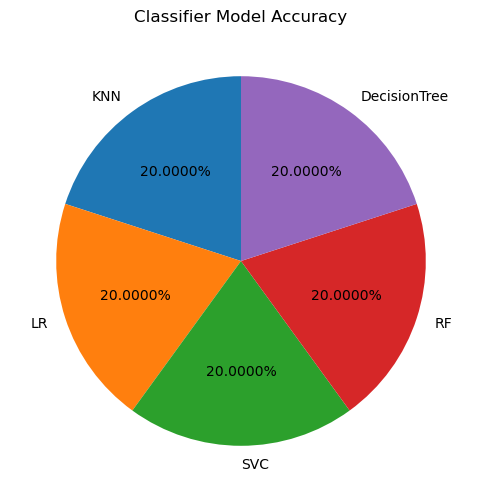

In [127]:
plt.figure(figsize=(8, 6))
plt.pie(tr_split['Score'], labels=tr_split['Name'], autopct='%1.4f%%', startangle=90)
plt.title('Classifier Model Accuracy')
plt.show()

<font color='green' size='5' face='verdana'>**   **</font>

<font color='navy' size='4'>**   **</font>

<font color='brown' size='3'>**   **</font>

<font color='darkviolet' size='3'>**   **</font>

<font color='lightblue' size='5' face='verdana'>**TAKE AWAY:**</font>


<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='green' size='5' face='verdana'>**   **</font>

<font color='LIGHTBLUE' size='5' face='verdana'>**TAKE AWAY:**</font>

<font color='green' size='5' face='verdana'>**   **</font>

Coastal regions tend to receive more precipitation than inland areas. Mountain ranges can also influence rainfall distribution.

Factors like temperature, humidity, and wind patterns can all affect rainfall patterns.